<ipython-input-14-20484bfd16d5>:8: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5., 5., 0.1)


<Figure size 640x480 with 0 Axes>

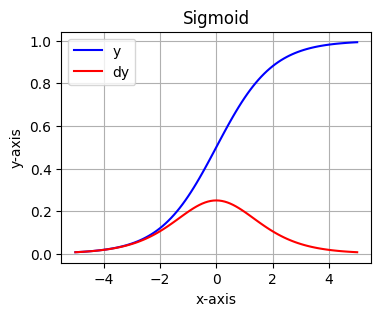

In [14]:
# 3-2 활성화 함수(Activation Functions)

# 3-2-1 -> Sigmoid

import torch
import matplotlib.pyplot as plt

x = torch.range(-5., 5., 0.1)
#그냥 y 값.
y = torch.sigmoid(x)
# y의 미분
sig_dy = y * (1- y)

plt.clf()
plt.figure(figsize=(4, 3))
plt.title("Sigmoid")
plt.plot(x.numpy(), y.numpy(), color = "blue")
plt.plot(x.numpy(), sig_dy.numpy(), color = "red")
plt.legend(("y", "dy"))
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.show()

Sigmoid 의 수식은 다음과 같다.

$$f(x)=\frac{1}{1+e^{-x}}$$

그리고 그에 해당하는 미분은... 다음과 같다. <br/>

$$f'(x) = f(x)(1-f(x))$$

<ipython-input-17-94d9021975e9>:6: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5., 5., 0.1)


<Figure size 640x480 with 0 Axes>

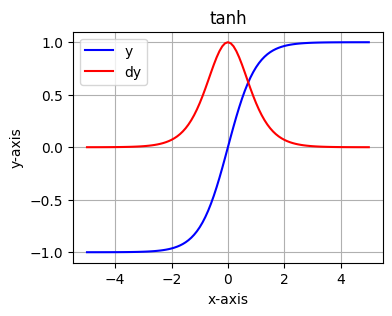

In [17]:
#3-2-2 Hyperbolic tangend(하이퍼볼린 탄젠트)

import torch
import matplotlib.pyplot as plt

x = torch.range(-5., 5., 0.1)
y = torch.tanh(x)
tanh_dy = (1 - y) * (1 + y)

plt.clf()
plt.figure(figsize=(4, 3))
plt.title("tanh")
plt.plot(x.numpy(), y.numpy(), color = "blue")
plt.plot(x.numpy(), tanh_dy.numpy(), color = "red")
plt.legend(("y", "dy"))
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.show()

tanh의 수식은 다음과 같다.

$$f(x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$

그리고 그에 해당하는 미분은... 다음과 같다. <br/>

$$f'(x) = (1-f(x))(1+f(x))=1-f(x)^2$$

추가적으로 sigmoid 함수와의 관계도 존재하는데..

$$f(x)=2Sigmoid(2x)-1$$와같다. <br/>

결국, 두함수의 주요한 차이는 입력값 x를 어떤 범위에 매칭시키느냐에 있다.
sigmoid 함수는 (0, 1)범위에 값을 매핑시키고, tanh은 (-1, +1) 범위까지 매핑 시킨다. 즉 음수 범위를 포함해 매칭하느냐, 아니냐의 차이가 존재하는 것이다.

Sigmoid/tanh함수는 딥러닝 발전역사에 있어서 매우 중요한 역할을 수행해 왔지만, 둘다 gradient가 1보다작기 때문에 은닉층이 깊어질수록 gradient가 소실되는 문제가 발생했다. 또한 비선형 함수에 대한 미분을 구하기위해 더많은연산을 필요로 하기 때문에(Relu에 비해서) 학습시간 측면에 있어서도 비효율적인 문제를 초래하였다. 이에 Relu가 등장한다.

<ipython-input-21-199bebd2452a>:7: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5., 5., 0.1)


<Figure size 640x480 with 0 Axes>

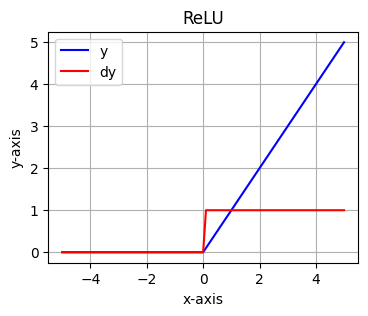

In [21]:
# 3.2.3

import torch
import matplotlib.pyplot as plt

relu = torch.nn.ReLU()
x = torch.range(-5., 5., 0.1)
y = relu(x)
dy = lambda y: 1 if y > 0 else 0


plt.plot(x.numpy(), y.numpy())
plt.clf()
plt.figure(figsize=(4, 3))
plt.title("ReLU")

plt.plot(x.numpy(), y.numpy(), color = "blue")
plt.plot(x.numpy(), [dy(y_val) for y_val in y.numpy()], color = "red")
plt.legend(("y", "dy"))
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.show()

tanh의 수식은 다음과 같다.

$$f(x)=\max(0, x)$$

그리고 그에 해당하는 미분은... 다음과 같다. <br/>

$$f'(x) = \begin{cases}1 & x > 0\\0 & x <= 0\end{cases}$$

미분도 매우 단순한 함수로 변경되어 연산속도의 개선, gradient_vanshing의 문제를 해결할 수 있는 함수로써 확인되고 널리 활용된다.

0.25


<ipython-input-34-56a4beddb663>:7: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5., 5., 0.1)


<Figure size 640x480 with 0 Axes>

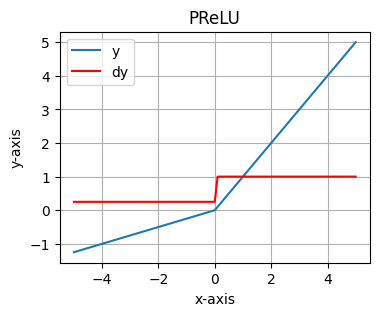

In [34]:
# 3.2.3 - PReLU

import torch
import matplotlib.pyplot as plt

prelu = torch.nn.PReLU(num_parameters=1)
x = torch.range(-5., 5., 0.1)
y = prelu(x)
negative_slope = prelu.weight.item()
print(negative_slope)
dy = lambda y: 1 if y > 0 else  negative_slope


plt.clf()
plt.figure(figsize=(4, 3))
plt.title("PReLU")
plt.plot(x.numpy(), y.detach().numpy())
plt.plot(x.numpy(), [dy(y_val) for y_val in y.detach().numpy()], color = "red")
plt.legend(("y", "dy"))
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.show()

In [35]:
# 3.2.4 - softmax

import torch.nn as nn
import torch
# -inf ~ +inf 범위를 지수함수 mapping이후 비율대로 분리 -> 확률로 변경하는 작업.
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[ 1.0280, -0.9125,  0.6613]])
tensor([[0.5445, 0.0782, 0.3773]])
tensor([1.0000])


k차원의 실수로 이루어진 벡터에서 i번째 요소인 $x_i$가 softmax레이어를 거쳐 확률로써 반환된다.
$$softmax(x_i) = \frac{e^{x_i}}{\sum_{f=1}^{k}{e^{x_f}} }$$<br/>

또한 확률론의 axiom에 의하면 모든 확률의 합은 항상 1이 되야한다.<br/>

$$\sum_{f=1}^{k}{softmax(x_i)} = 1$$


softmax함수의 미분도 역시 존재한다.
$$\frac{\partial y_i}{\partial x_i} = softmax(x_i) * (1 - softmax(x_i))$$ <br/>

어디서 많이본 식이 아닌가? 바로위에.. 그렇다. sigmoid와 미분의 형태가 똑같다.

이는 절대 우연이 아니며, 활성화 함수 아래에 확률론, 엔트로피, 수많은 수학적 기저 지식이 아래에 깔려있음을 의미한다고 볼 수 있다.

https://velog.io/@gwkoo/logit-sigmoid-softmax%EC%9D%98-%EA%B4%80%EA%B3%84
https://yngie-c.github.io/machine%20learning/2020/04/19/Logistic_Regression/

activation이 되기전 출력하는 수의 범위를 생각 해보면, 일반적인 신경망에서 affine transformation을 수행 하였을때 출력되는 수의 범위와 같을 것이다. 당연하게도 그값은 (-inf, +inf)의 범위를 가진다.

이는, 베르누이 분포에서 나오는 P(x|u)와 그 여사건의 확률의 비에 자연로그를 취한 형태로 볼수 있다.

$$oddsratio = \frac{\mu}{1- \mu}$$

그리고 이에의해 도출되는 logit 이라는 것은..

$$logit(oddsratio) = ln(\frac{\mu}{1-\mu})$$

마지막으로 logit을 z(역함수변환)로두고 정리를 수행하면, 위와 같이 된다..
$$logistic(z)=\mu(z)=\frac{1}{1+exp(-z)}, z=w^Tx$$

이지점에서 sigmoid 함수의 의미를 알 수 있다. 무한대의 범위를 가지는 z에 대해서 이진분류를 수행할 수 있도록 하는 것이다. 단순히 z가 0보다 크냐 작냐에 따라서 분류를 수행할 수도 있겠지만, 그렇게 하면 역전파 과정시에 "신경망이 확신하는 정도"를 그전 레이어에 전달하는 것이 불가능해진다.

